# Diabetes Prediction
This is to predict diabetes contiuous variable using some randome indepedent features. Dataset may not be valid to understand the problem.
1. Simple Linear Regression
2. Gradient Decent(Batch)
3. Ridge
4. Lasso
5. Huber Regression

# Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
%matplotlib inline

In [2]:
db_df=pd.read_csv('../../data/diabetes.csv')

In [3]:
db_df.head(4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206


In [4]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    int64  
 1   sex     442 non-null    int64  
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    int64  
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    int64  
 10  y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


# Examine and visualize the data

In [5]:
db_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
sex,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
bmi,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
bp,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
s1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
s2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
s3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
s4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
s5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
s6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


In [6]:
db_df.corr().T

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


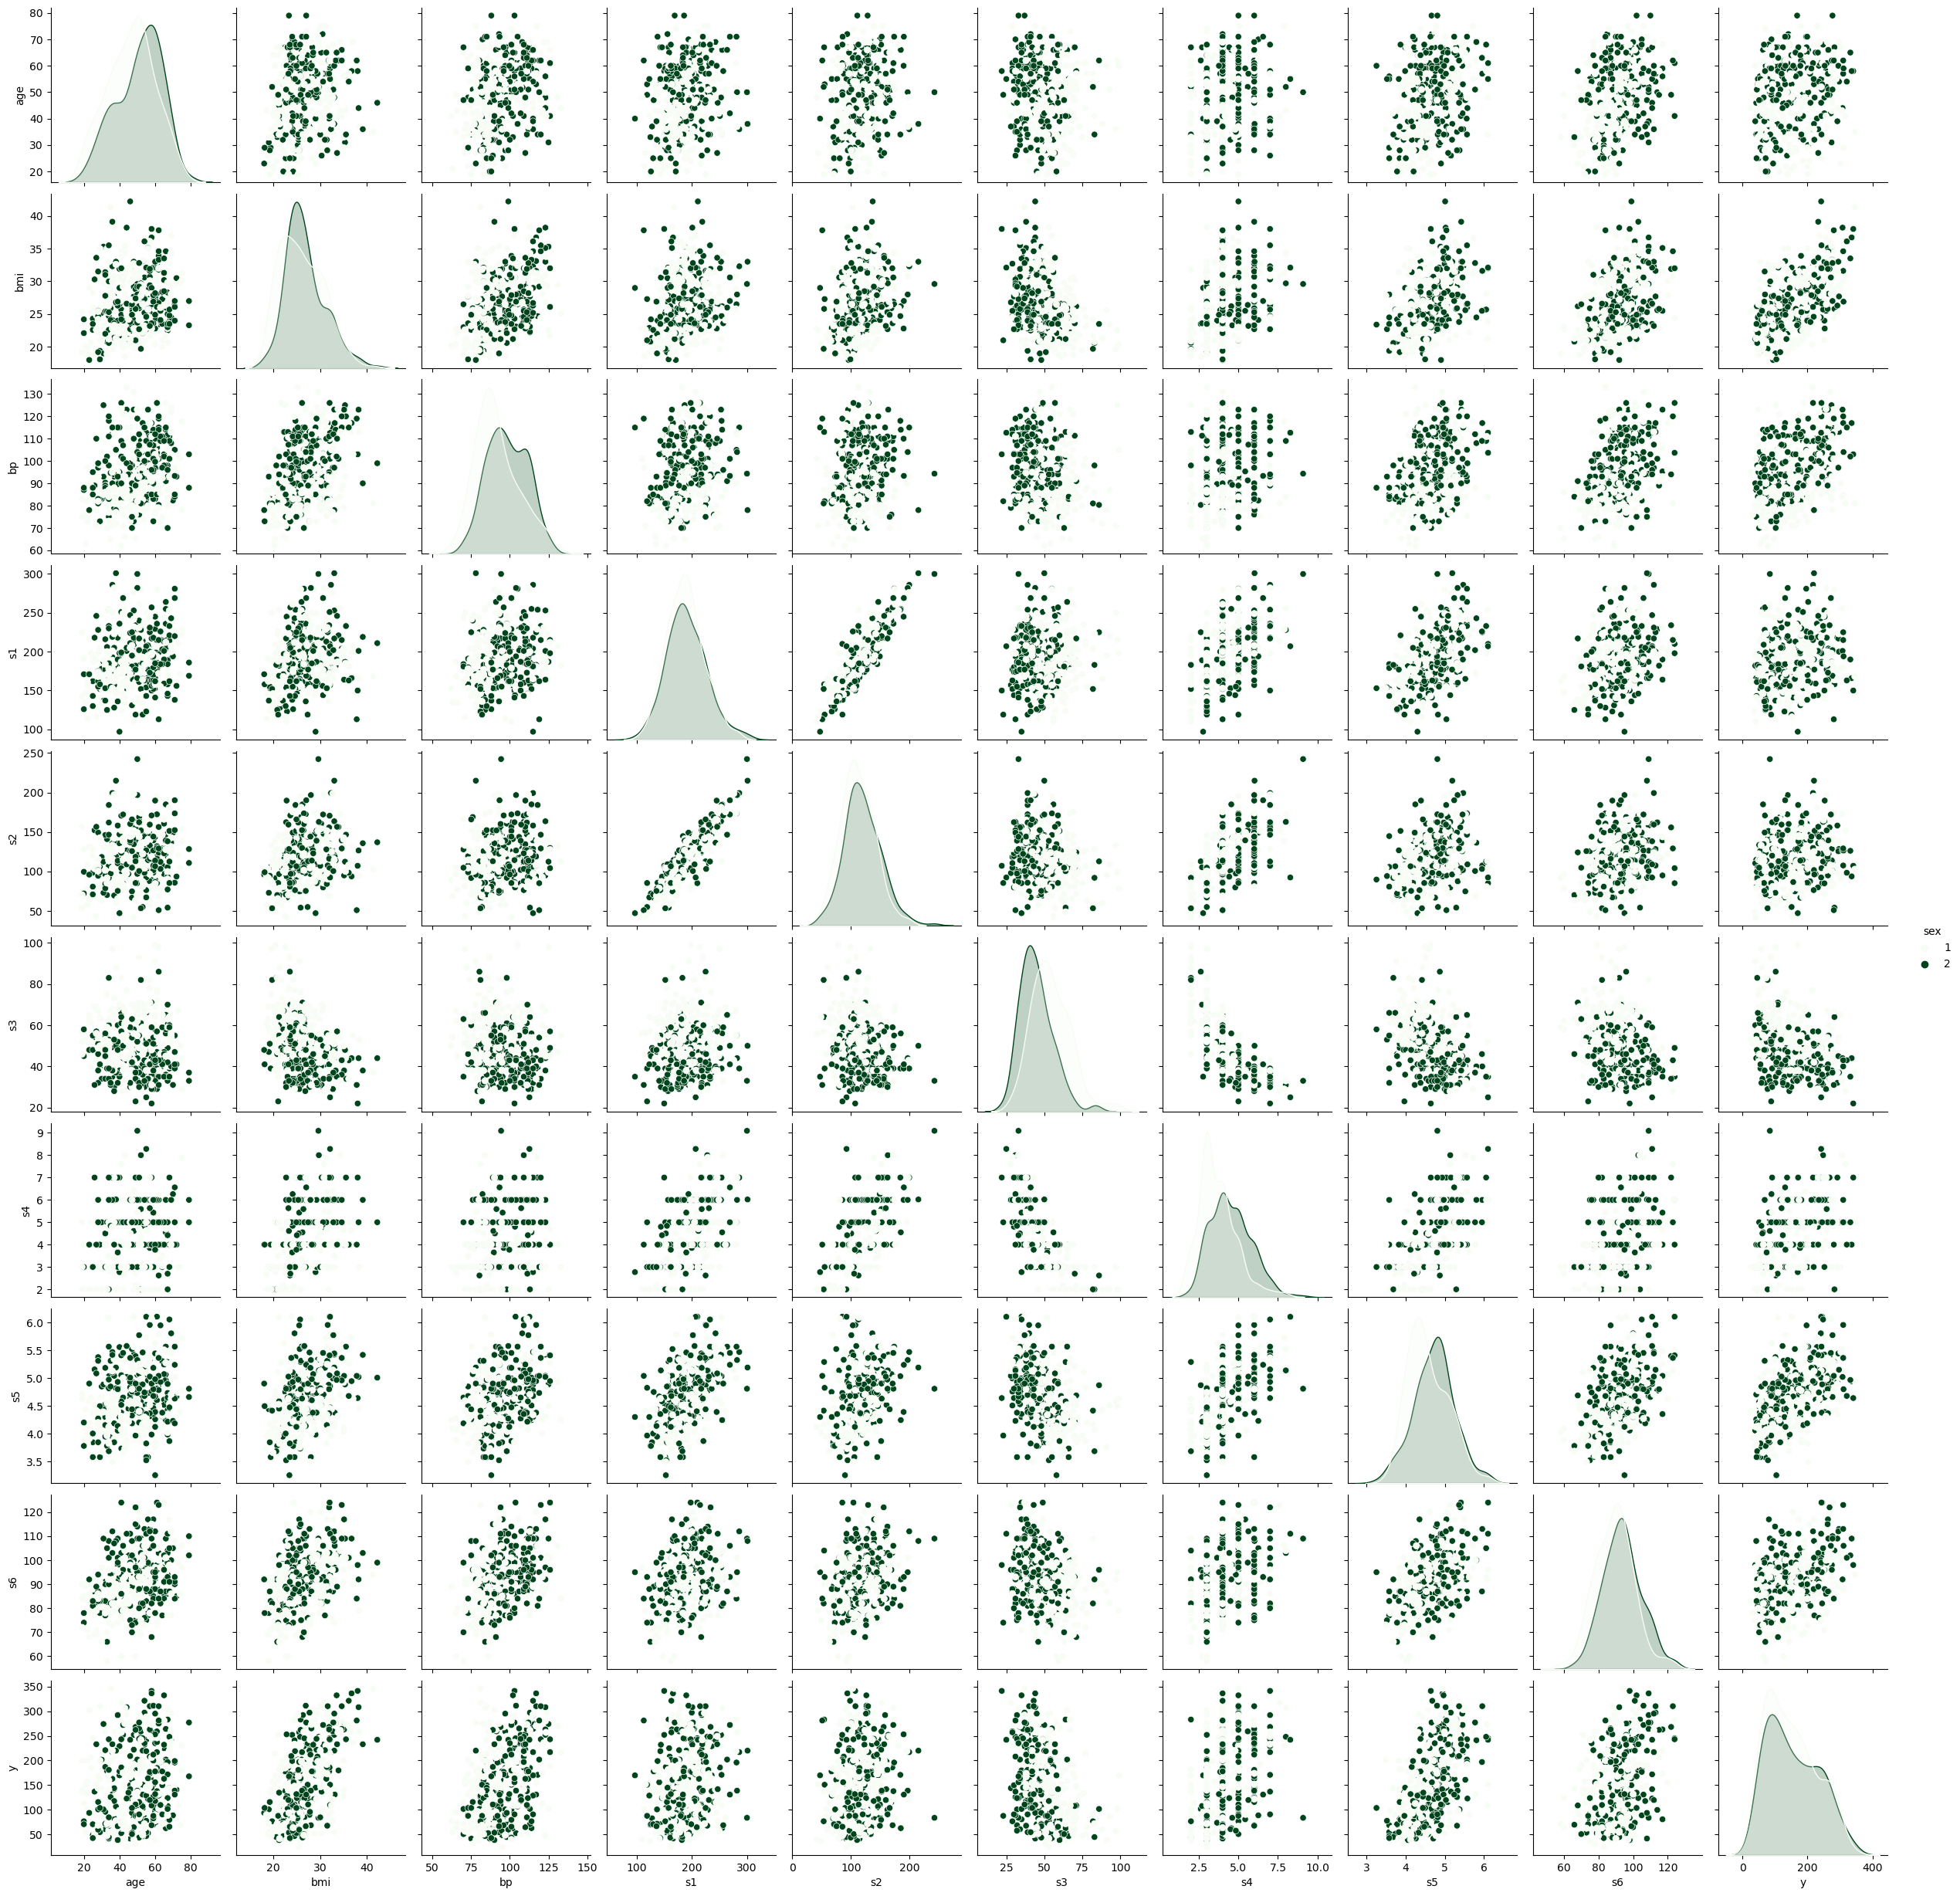

In [7]:
sns.pairplot(db_df,hue='sex',palette='Greens')

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

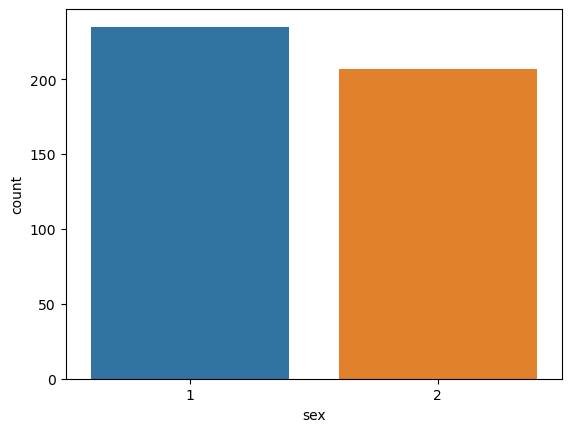

In [8]:
sns.countplot(db_df['sex'])

<AxesSubplot:xlabel='age', ylabel='Count'>

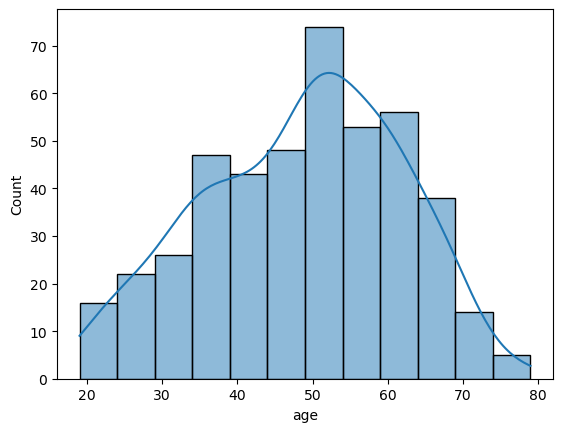

In [9]:
sns.histplot(db_df['age'],kde=True)

<AxesSubplot:>

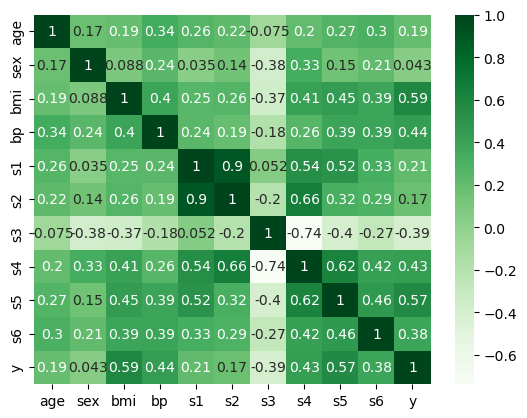

In [10]:
sns.heatmap(db_df.corr(),annot=True,cmap='Greens')

# Model Building

## Scaling

In [29]:
X=db_df.drop(columns=['y'])
y=pd.DataFrame({'y':db_df['y']})
scalar = StandardScaler()
scaled_df=scalar.fit_transform(X)
X=pd.DataFrame(scaled_df,columns=X.columns)


## LinearRegression

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
lm=LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression()

In [14]:
prediction=lm.predict(X_train)

In [15]:
train_pred=pd.DataFrame({'actual':y_train['y'],'predicted':prediction[:,0]})

In [16]:
train_pred

,actual,predicted
415,174,168.119894
329,135,107.562510
175,127,119.802497
61,144,177.032696
150,288,206.098814
...,...,...
337,91,168.466858
91,164,185.221992
80,143,171.433770
191,178,131.082926


In [17]:
print ('R2 for training data: ', lm.score (X_train, y_train))
print ('R2 for test data: ', lm.score (X_test, y_test))

R2 for training data:  0.4915144950607675
R2 for test data:  0.5771689611166475


## SGDRegressor (Batch mode)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
sgd_bm=SGDRegressor(average=True,shuffle=False,max_iter=100000)

In [19]:
sgd_bm.fit(X_train,y_train)

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(average=True, max_iter=100000, shuffle=False)

In [20]:
print ('Intercept : ', sgd_bm.intercept_)
print ('Coef : ', sgd_bm.coef_)
print ('R2 for training data: ', sgd_bm.score (X_train, y_train))
print ('R2 for training data: ', sgd_bm.score (X_test, y_test))

Intercept :  [152.79187661]
Coef :  [ -3.13037139 -11.60289829  24.29871304  14.4874572  -14.325209
   4.66486758  -5.48352891   1.8941831   28.90933125   3.93148686]
R2 for training data:  0.4913689206472699
R2 for training data:  0.57470585406729


## Ridge

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
ridge = Ridge(alpha=1.0)

In [22]:
ridge.fit(X_train,y_train)

Ridge()

In [23]:
print ('Intercept : ', ridge.intercept_)
print ('Coef : ', ridge.coef_)
print ('R2 for training data: ', ridge.score (X_train, y_train))
print ('R2 for test data: ', ridge.score (X_test, y_test))

Intercept :  [152.89842764]
Coef :  [[ -3.13702026 -11.56832687  24.21021508  14.50108696 -16.02345875
    6.03883959  -4.66321837   2.19402264  29.48784876   3.9204257 ]]
R2 for training data:  0.4914298780777261
R2 for test data:  0.5753242196629473


## Lasso

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)


Lasso(alpha=0.1)

In [25]:
print ('Intercept : ', lasso.intercept_)
print ('Coef : ', lasso.coef_)
print ('R2 for training data: ', lasso.score (X_train, y_train))
print ('R2 for test data: ', lasso.score (X_test, y_test))

Intercept :  [152.91366949]
Coef :  [ -2.97833446 -11.42254341  24.31682803  14.36940807  -9.45842438
   0.80632981  -7.5086123    1.27948844  27.23735531   3.78947878]
R2 for training data:  0.4910998337261293
R2 for test data:  0.5726765335775044


## HuberRegressor

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
huber = HuberRegressor()

In [27]:
huber.fit(X_train,y_train)

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HuberRegressor()

In [28]:
print ('Intercept : ', huber.intercept_)
print ('Coef : ', huber.coef_)
print ('R2 for training data: ', huber.score (X_train, y_train))
print ('R2 for test data: ', huber.score (X_test, y_test))

Intercept :  152.80832171557068
Coef :  [ -4.16560249 -13.28297602  24.41246495  15.11046601 -17.51287784
   6.8688274   -5.59281996   0.31656622  31.78347357   3.6778234 ]
R2 for training data:  0.4901754469707714
R2 for test data:  0.5675261018190356
